In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

In [18]:
class DCT:
    def __init__(self,N):
        self.N = N # データ数
        # 1次元DCTの基底ベクトルの生成
        self.phi_1d = np.array([ self.phi(i) for i in range(self.N)])
        # 2次元DCTの基底ベクトルの格納
        self.phi_2d = np.zeros((N,N))
                
    def phi(self,k):
        """ 離散コサイン変換(DCT)の基底関数 """
        # DCT-II
        if k == 0:
            return np.ones(self.N)/np.sqrt(self.N)
        else:
            return np.sqrt(2.0/self.N)*np.cos((k*np.pi/(2*self.N))*(np.arange(self.N)*2+1))
        
    def dct(self,data):
        """ 1次元離散コサイン変換を行う """
        return self.phi_1d.dot(data)

    def idct(self,c):
        """ 1次元離散コサイン逆変換を行う """
        return np.sum( self.phi_1d.T * c)
    
    def get_dct2_phi(self,i,j):
        """ 2次元離散コサイン変換の基底を返す """
        phi_i,phi_j = np.meshgrid(self.phi_1d[i],self.phi_1d[j])
        return phi_i*phi_j
    
    def get_dct2(self,i,j,data):
        """ i,jの2次元DCT係数を返す """
        phi_2d_phi = np.zeros((self.N,self.N))
        phi_2d_phi = self.get_dct2_phi(i,j)
        return np.sum(phi_2d_phi.reshape(self.N*self.N)*data.reshape(self.N*self.N))
    
    def dct2(self,data):
        """ 2次元離散コサイン変換を行う """
        for j in tqdm(range(self.N)):
            for i in tqdm(range(self.N),leave=False):
                self.phi_2d[i,j] = self.get_dct2(i,j,data)
        
        return self.phi_2d
    
    def idct2(self,c):
        """ 2次元離散コサイン逆変換を行う """
        idct2_data = np.zeros((self.N,self.N))
        phi_2d_phi = np.zeros((self.N,self.N))
        for i in tqdm(range(self.N)):
            for j in tqdm(range(self.N),leave=False):
                phi_2d_phi = self.get_dct2_phi(j,i)
                idct2_data += c.reshape((self.N,self.N,1))[j,i]*phi_2d_phi
        
        return idct2_data

In [65]:
dct = DCT(10)

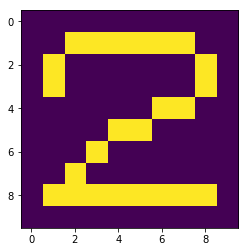

In [66]:
img = np.array([
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,1,1,1,1,0,0],
    [0,1,0,0,0,0,0,0,1,0],
    [0,1,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,1,1,0,0],
    [0,0,0,0,1,1,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,1,1,1,1,1,1,1,1,0],
    [0,0,0,0,0,0,0,0,0,0]
])
plt.imshow(img)

In [67]:
c = dct.dct2(img)

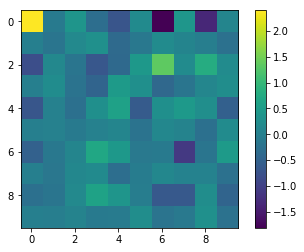

In [68]:
plt.imshow(c)
plt.colorbar()

In [69]:
y = dct.idct2(c)

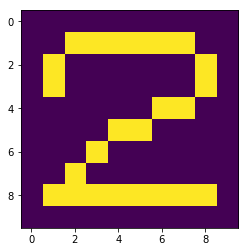

In [70]:
plt.imshow(y)

# 画像の読み込み

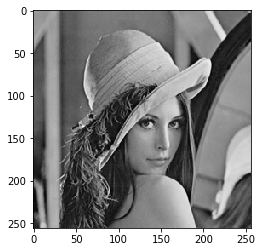

In [7]:
bmp = Image.open("LENNA.bmp")
data = np.array(bmp)
plt.imshow(bmp,"gray")

In [19]:
dct = DCT(256)

In [20]:
c = dct.dct2(data)

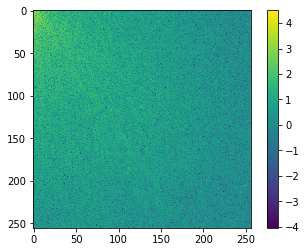

In [21]:
plt.imshow(np.log10(np.abs(c)))
plt.colorbar()

In [22]:
y = dct.idct2(c)

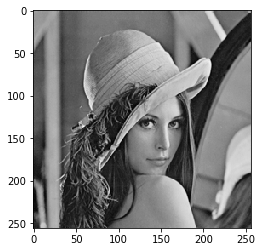

In [97]:
plt.imshow(y,"gray")

In [26]:
c_128 = np.array(c[:128,:128])
c_128.shape

(128, 128)

In [27]:
dct_128 = DCT(128)

In [29]:
y_128 = dct_128.idct2(c_128)

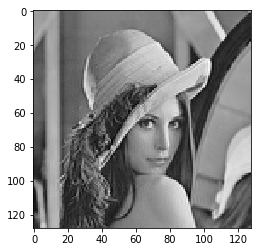

In [30]:
plt.imshow(y_128,"gray")

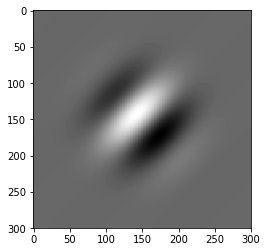

In [33]:
rgabor = Image.open("Rgabor.png").convert("L")
data = np.array(rgabor)
plt.imshow(rgabor,"gray")

In [34]:
data.shape

(300, 300)

In [35]:
dct_300 = DCT(300)

In [37]:
c_300 = dct_300.dct2(data)

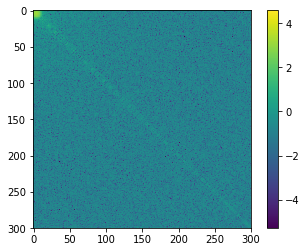

In [38]:
plt.imshow(np.log10(np.abs(c_300)))
plt.colorbar()

In [41]:
c_128 = c_300[:128,:128]
y_128 = dct_128.idct2(c_128)

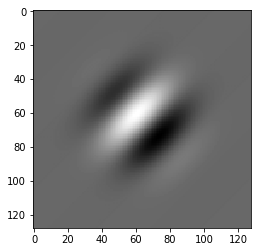

In [42]:
plt.imshow(y_128,"gray")